- we have two types of scaling

         -  Z score (Standardization)

         -  Min max scalar(Normalization)

**Z score**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read visadataset
# Read bank.csv
file_path=r"C:\Users\USER\Documents\Gen_ai\Data science and AI\Data File\Visadataset.csv"
visa_df=pd.read_csv(file_path)


cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns


In [3]:
# step-1: take the pwage data
# step-2: calculate mean of the data
# step-3: calculate std of the data
# step-4: Nr=data-mean step1-step2
# step_5: z_wage=NR/std=step4/step3
# step-6: create n new column visa_df[z_wage']=z_wage
pwage=visa_df['prevailing_wage']
mean=pwage.mean()
std=pwage.std()
Nr=pwage-mean
z_Wage=Nr/std
visa_df['z_Wage']=z_Wage


In [4]:
visa_df[['prevailing_wage','z_Wage']]

,prevailing_wage,z_Wage
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


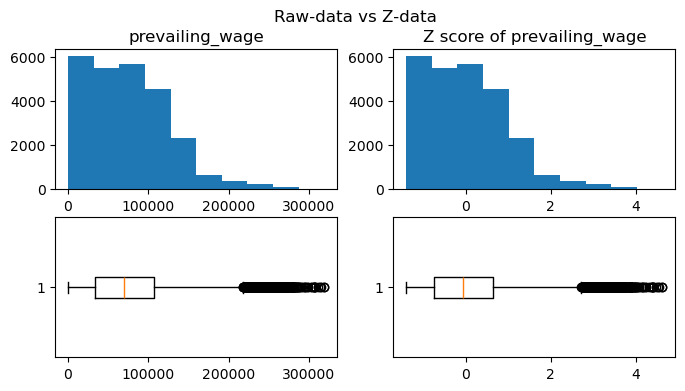

In [5]:
plt.figure(figsize=(8,4))
plt.suptitle('Raw-data vs Z-data')
plt.subplot(2,2,1).hist(pwage)
plt.title('prevailing_wage')
plt.subplot(2,2,2).hist(z_Wage)
plt.title('Z score of prevailing_wage')
plt.subplot(2,2,3).boxplot(pwage,vert=False)
plt.subplot(2,2,4).boxplot(z_Wage,vert=False)
plt.show()

**StandardScalar**

- sklearn

  - preprocessing

      - StandardScalar

In [6]:
#step-1:import method
# step-2: save the method
# step-3: apply fit tansform
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
pwage_ss=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df['pwage_ss']=pwage_ss

In [7]:
visa_df[['prevailing_wage','z_Wage','pwage_ss']]

,prevailing_wage,z_Wage,pwage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [21]:
visa_df
visa_df['prevailing_wage']
visa_df['prevailing_wage'].values
visa_df['prevailing_wage'].values.reshape(-1,1)

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
pwage_ss=ss.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))
pwage_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

**min-max-Scalar**

In [19]:
# step-1:read the data
#step-2: calculate min

wage_data=visa_df['prevailing_wage']
wage_data_min=wage_data.min()
wage_data_max=wage_data.max()
Nr=wage_data-wage_data_min
Dr=wage_data_max-wage_data_min
Nr/Dr


0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

**MinMaxScalar**

In [33]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
pwage_MMS=MMS.fit_transform(visa_df[['prevailing_wage']])
visa_df['pwage_MMS']=pwage_MMS

In [34]:
visa_df[['pwage_MMS']]

,pwage_MMS
0,0.001849
1,0.261345
2,0.385312
3,0.261371
4,0.469616
...,...
25475,0.241505
25476,0.874579
25477,0.458311
25478,0.269895
